### Exploratory Data Analysis For UCI Heart Disease Dataset

In [ ]:
#Importing initial necessary libraries as required for now
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")

In [2]:
#Loading the dataset given in assignment
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Data is already preprocessed

In [3]:
#Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [4]:
#Checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

We can see there are few missing values in ca and thal features

In [7]:
#Checking different values count in ca-column
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [8]:
#Checking different values counts in thal column
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [ ]:
#Handling missing values by replacing '?' with NAN
df.replace('?', np.nan, inplace=True)

In [10]:
#Handling missing values with mode imputation
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [11]:
#Verifying that there are no missing values left
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
#displaying statistical summary of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [13]:
#Converting target variable to binary
# 0 -> No heart disease
#1,2,3,4 -> Heart disease 
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [14]:
# Target variable distribution
df['num'].value_counts()

num
0    164
1    139
Name: count, dtype: int64

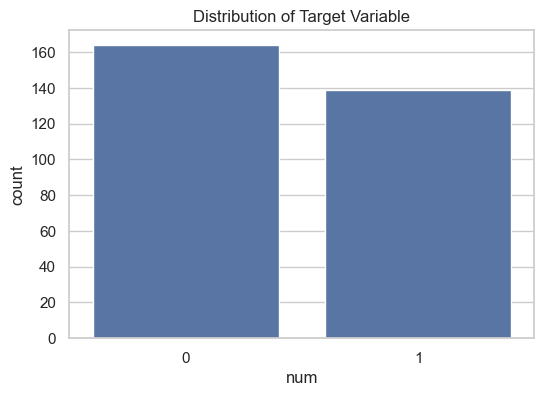

In [15]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [16]:
#Seperating categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

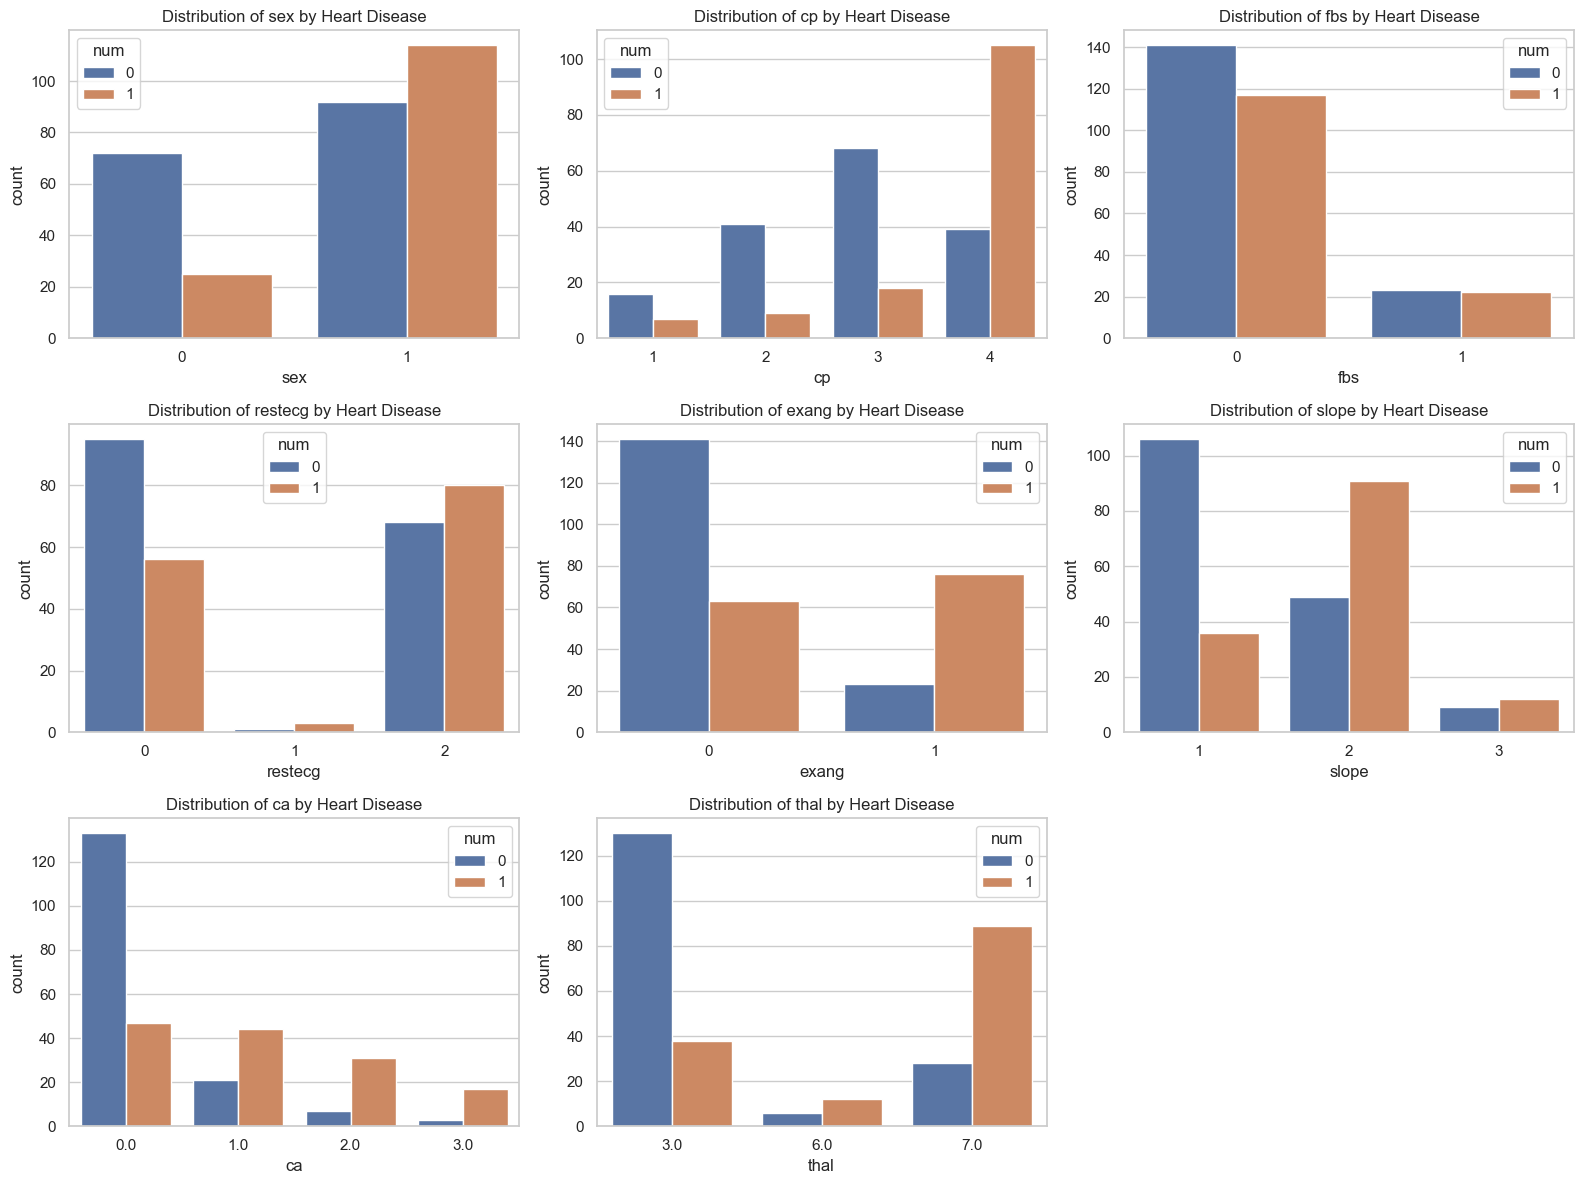

In [17]:
# Bar plots for categorical variables using subplots
plt.figure(figsize=(16, 12))    
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f'Distribution of {col} by Heart Disease')
plt.tight_layout()
plt.show()

Insights:
1. Chest pain type  seems to have a significant impact on heart disease presence.
2. Exercise-induced angina also shows a notable difference between the two groups.

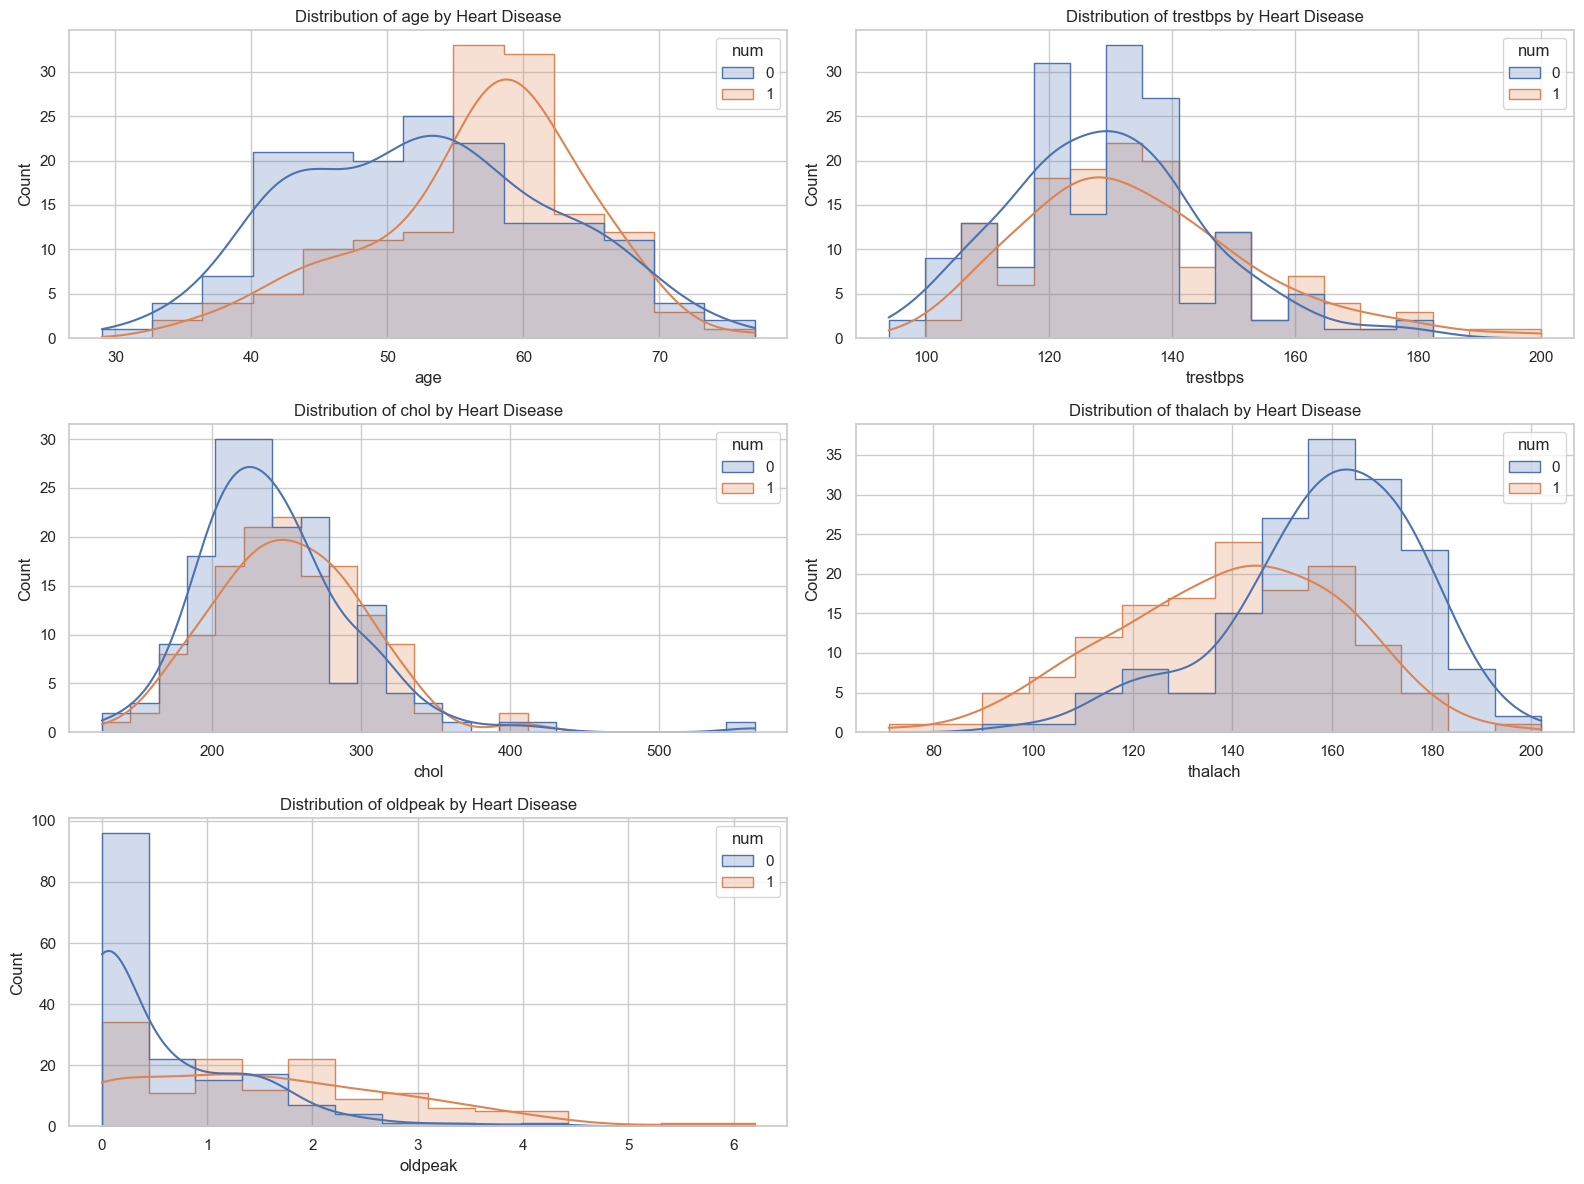

In [18]:
# Histograms for numerical variables using subplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, hue='num', kde=True, element='step')
    plt.title(f'Distribution of {col} by Heart Disease')
plt.tight_layout()
plt.show()

Age: The likelihood of heart disease increases with advancing age, indicating that older individuals are at greater risk.

Resting Blood Pressure (Trestbps): Patients with elevated resting blood pressure show a stronger association with heart disease compared to those with normal levels.

Cholesterol (Chol): Higher cholesterol values correlate with a greater incidence of heart disease, highlighting cholesterol as a significant risk factor.

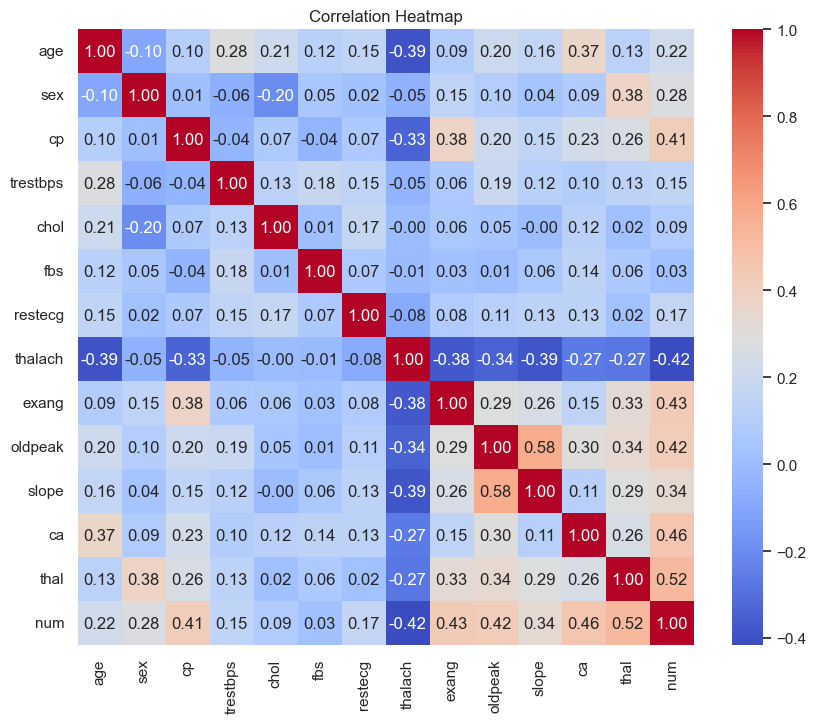

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

Insights from Correlation Heatmap
Age vs. Maximum Heart Rate: A moderate negative correlation exists, showing that as age increases, maximum heart rate tends to decrease.

Chest Pain Type vs. Heart Disease: Chest pain type demonstrates a positive correlation with heart disease, indicating that certain pain categories are more strongly linked to the condition.

Resting Blood Pressure vs. Cholesterol: A weak positive correlation is observed, suggesting that individuals with higher resting blood pressure may also exhibit elevated cholesterol levels.

ST Depression vs. Heart Disease: ST depression (exercise‑induced relative to rest) correlates positively with heart disease, meaning higher ST depression values are associated with greater risk.

EDA & Preprocessing Summary
The dataset was successfully loaded, and its basic structure and attributes were examined.

Missing values in the ca and thal columns were addressed using mode imputation to ensure data completeness.

The target variable num was transformed into a binary classification format, simplifying the multivariate labels into presence/absence of heart disease.

Distributions of both categorical and numerical features were visualized against the target variable to highlight key patterns.

A correlation heatmap was generated to explore inter‑feature relationships and identify potential predictors.

Since categorical attributes were already encoded numerically, no additional encoding was required.

